In [73]:
from PIL import Image
import os

def reveal_mystery_image(image_path):
    # Resmi yükle
    image = Image.open(image_path)

    # Eğer resim RGB formatında değilse, dönüştür
    image = image.convert('RGB')

    # Piksel verilerini al
    pixels = image.load()

    # Resimdeki her piksel için döngü
    for x in range(image.width):
        for y in range(image.height):
            # Mevcut pikselin kırmızı, yeşil ve mavi değerlerini al
            r, g, b = pixels[x, y]

            # Kırmızı değeri düzelt
            corrected_r = r * 10

            # Yeşil ve mavi değerleri sıfırla (gürültüyü kaldır)
            corrected_g = 0
            corrected_b = 0

            # Güncellenmiş renk değerlerini piksele geri yaz
            pixels[x, y] = (corrected_r, corrected_g, corrected_b)

    # Modifiye edilmiş resmi kaydet
    # Resmin adını ve uzantısını ayır
    file_name, file_extension = os.path.splitext(image_path)
    # Uzantıyı koruyarak yeni bir dosya adı oluştur
    output_path = f'{file_name}_revealed{file_extension}'
    image.save(output_path)
    return output_path

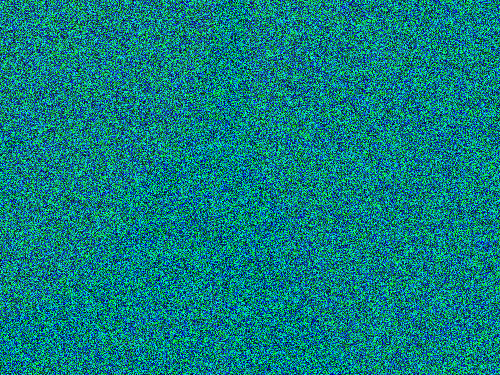

In [74]:
from IPython.display import Image as ColabImage
ColabImage('./images/nullcon.jpg')

In [75]:
reveal_mystery_image('./images/nullcon.jpg')

'./images/nullcon_revealed.jpg'

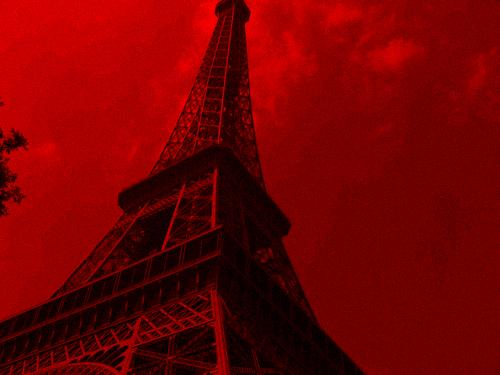

In [76]:
from IPython.display import Image as ColabImage
ColabImage('./images/nullcon_revealed.jpg')

Orijinal bir resmin kırmızı değerlerini belirli bir katsayıya bölerek ve diğer renk kanallarına rastgele değerler ekleyerek bir bulmaca resmi oluşturan  Nifty Image Puzzles kodu.

In [77]:
import numpy as np
from PIL import Image

def create_puzzle(image_path, output_path):
    # Resmi yükle
    img = Image.open(image_path)
    img_array = np.array(img)

    # Rastgele gürültü üret
    noise = np.random.randint(0, 256, img_array.shape)

    # Kırmızı değerleri böl ve diğer kanalları rastgele gürültü ile değiştir
    puzzle_array = img_array.copy()
    puzzle_array[:, :, 0] = puzzle_array[:, :, 0] // 10  # Kırmızı değerleri böl
    puzzle_array[:, :, 1] = noise[:, :, 1]  # Yeşil kanalı gürültü ile değiştir
    puzzle_array[:, :, 2] = noise[:, :, 2]  # Mavi kanalı gürültü ile değiştir

    # Bulmaca resmini kaydet
    puzzle_image = Image.fromarray(puzzle_array)
    puzzle_image.save(output_path)

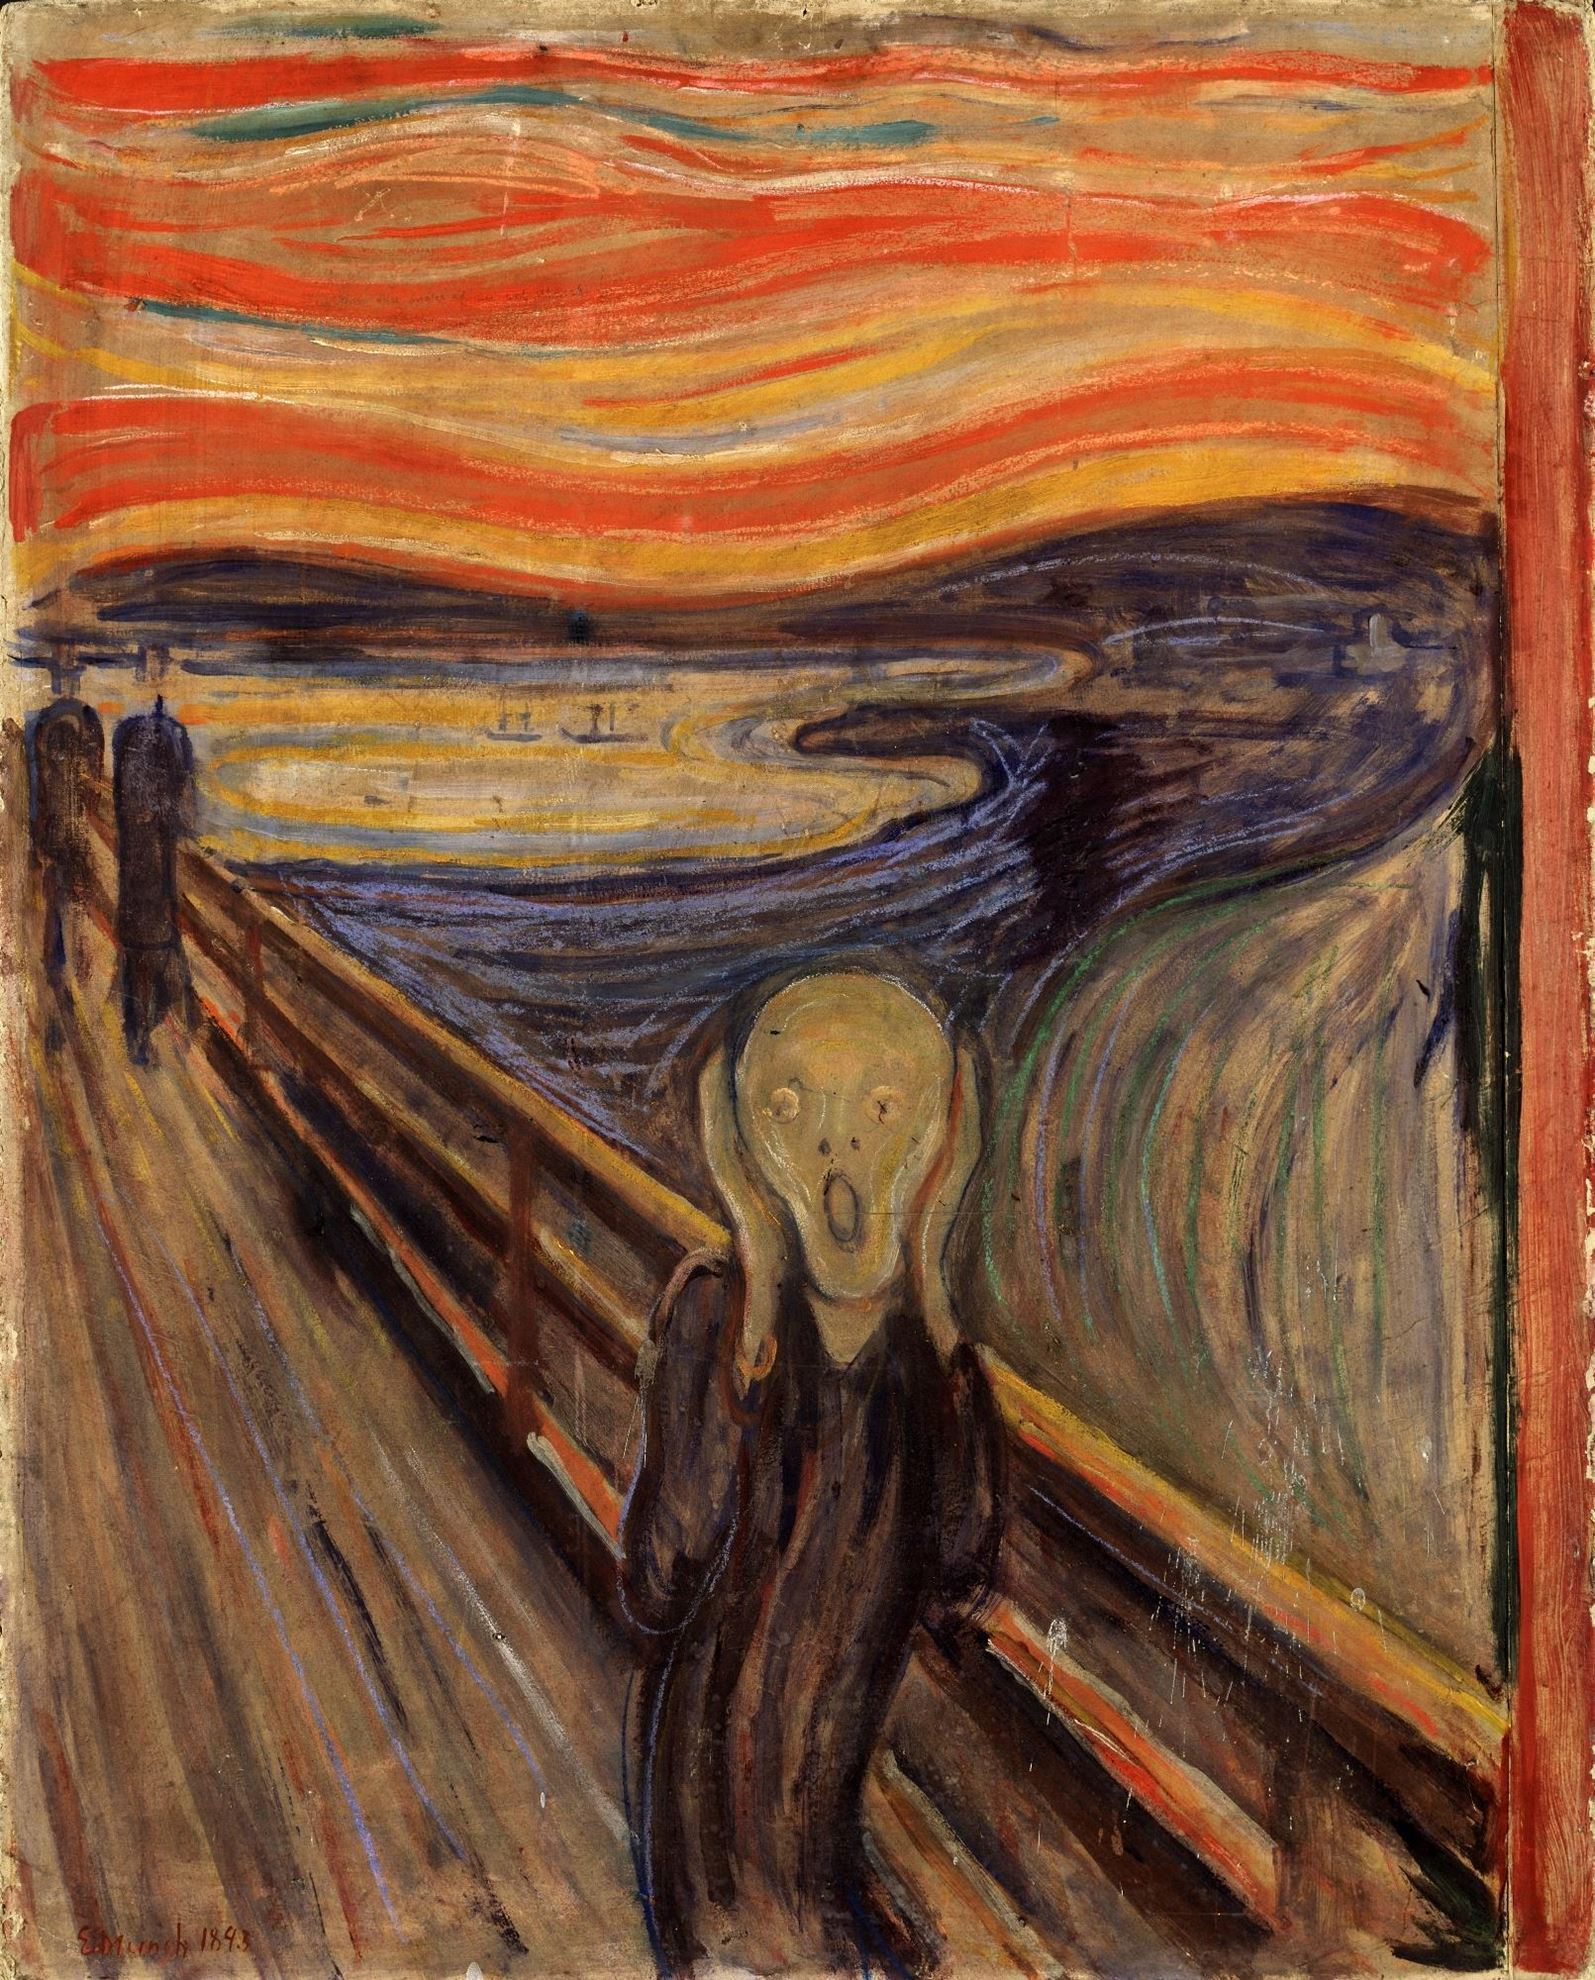

In [78]:
from IPython.display import Image as ColabImage
ColabImage('./images/original_image.jpg')

In [80]:
# Orijinal resmin yolu ve bulmaca resminin kaydedileceği yol
original_image_path = './images/original_image.jpg'
puzzle_image_path   = './images/puzzle_image.png'

# Bulmaca resmini oluştur ve kaydet
create_puzzle(original_image_path, puzzle_image_path)

In [81]:
from IPython.display import Image as ColabImage
ColabImage(puzzle_image_path)

Output hidden; open in https://colab.research.google.com to view.

In [83]:
revealed_image_path = reveal_mystery_image(puzzle_image_path)

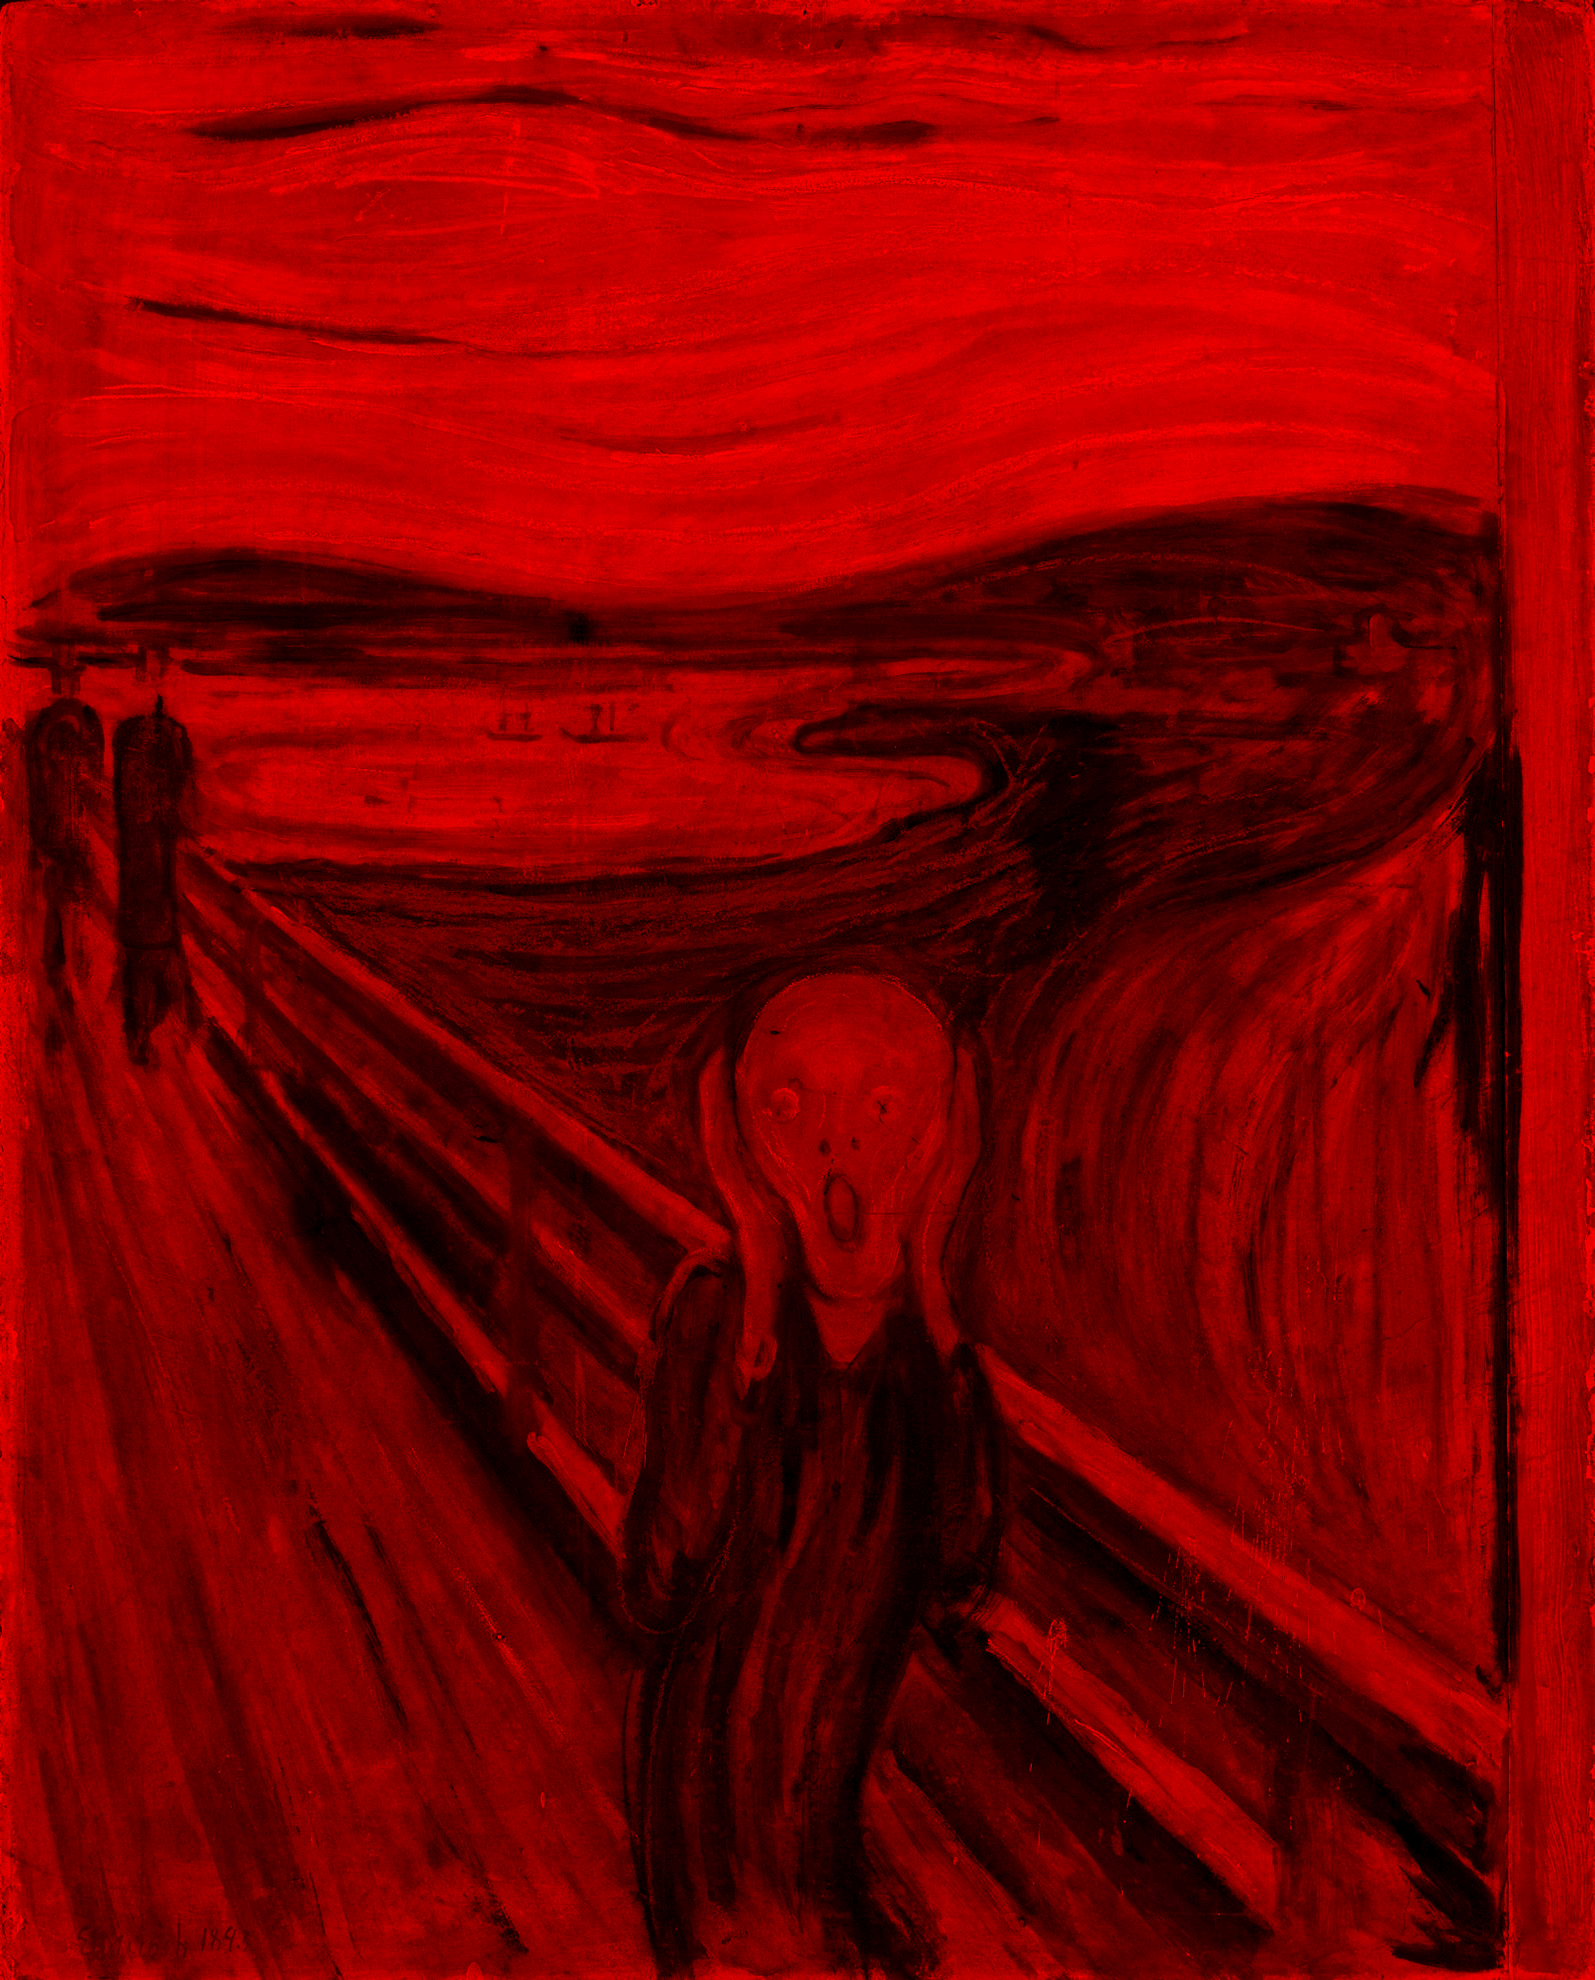

In [84]:
from IPython.display import Image as ColabImage
ColabImage(revealed_image_path)